### Task 1: Understand the Problem Statement


The objective of this case study is to predict the health insuarance cost incurred by individuals based on their age, gender, BMI, number of children, smoking habit and geo-location.

The available features are:
<li> sex: insurance contractor gender </li>
<li> BMI : Body mass index(ideally 18.5 to 24.9)
<li> children: Number of children covered by health/insurance/ Number of dependents </li>
<li> smoker : smoking </li>
<li> region: the beneficiarys residential area in the US, northeast, southeast, southwest, northwest. </li>
<br>
Target(output):

<li> charges: Individual medical costs billed by health insurance </li>

### Task 2: Import Libraries and Datset

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from jupyterthemes import jtplot
#jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly

In [68]:
insurance_df = pd.read_csv('insurance.csv')

In [69]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [70]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Task 3: Perfom Exploratory Data Analysis


In [71]:
# check if there are any Null values
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [72]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

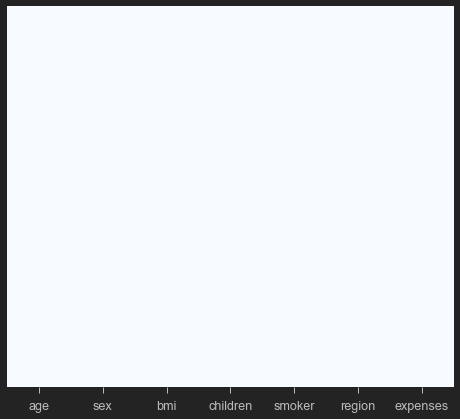

In [73]:
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [74]:
# Check the dataframe info

insurance_df.describe()


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [75]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index

df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,expenses
region,,,,
northeast,39.268519,29.176235,1.046296,13406.384691
northwest,39.196923,29.201846,1.147692,12417.575169
southeast,38.939560,33.359341,1.049451,14735.411538
southwest,39.455385,30.596615,1.141538,12346.937908


In [76]:
#Group data by 'age' and examine the relationship between 'age' and 'charges'

df_age = insurance_df.groupby(by='age').mean()
df_age

,bmi,children,expenses
age,,,
18,31.333333,0.449275,7086.217971
19,28.598529,0.426471,9747.909706
20,30.627586,0.862069,10159.697931
21,28.189286,0.785714,4730.464286
22,31.092857,0.714286,10012.932857
23,31.460714,1.000000,12419.820357
24,29.142857,0.464286,10648.015714
25,29.689286,1.285714,9838.365000
26,29.435714,1.071429,6133.825714


### Task 4: Perform Feature Engineering

In [77]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [78]:
# convert categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [79]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [80]:
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [81]:
# convert categorical variable to numerical
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [82]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [83]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [84]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)

In [85]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [86]:
insurance_df = pd.concat([insurance_df, region_dummies], axis=1)

In [87]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,0,0,1
1,18,1,33.8,1,0,southeast,1725.55,0,1,0
2,28,1,33.0,3,0,southeast,4449.46,0,1,0
3,33,1,22.7,0,0,northwest,21984.47,1,0,0
4,32,1,28.9,0,0,northwest,3866.86,1,0,0


In [88]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)

In [89]:
insurance_df.head()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0


### Task 5: Perform Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BBEDC8BF40>,
      dtype=object)

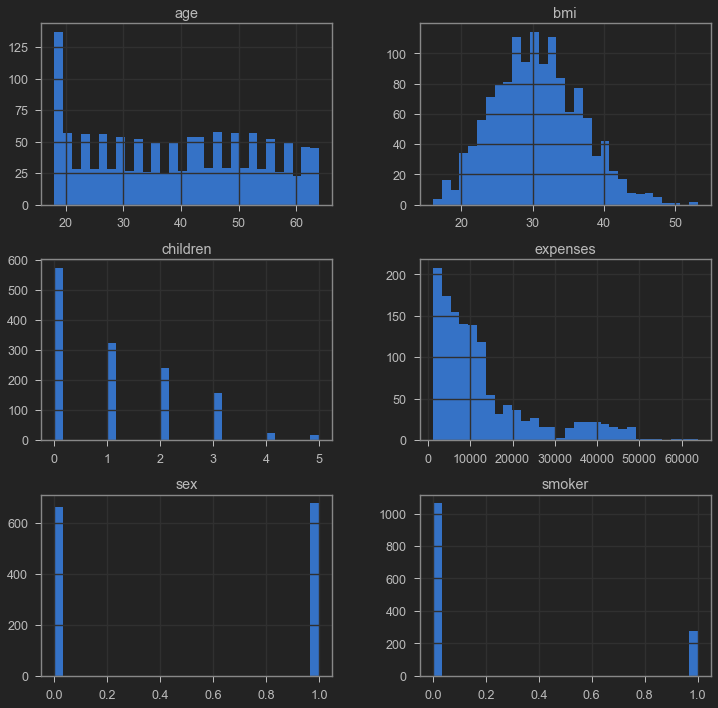

In [90]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'expenses']].hist(bins=30, figsize=(12,12))

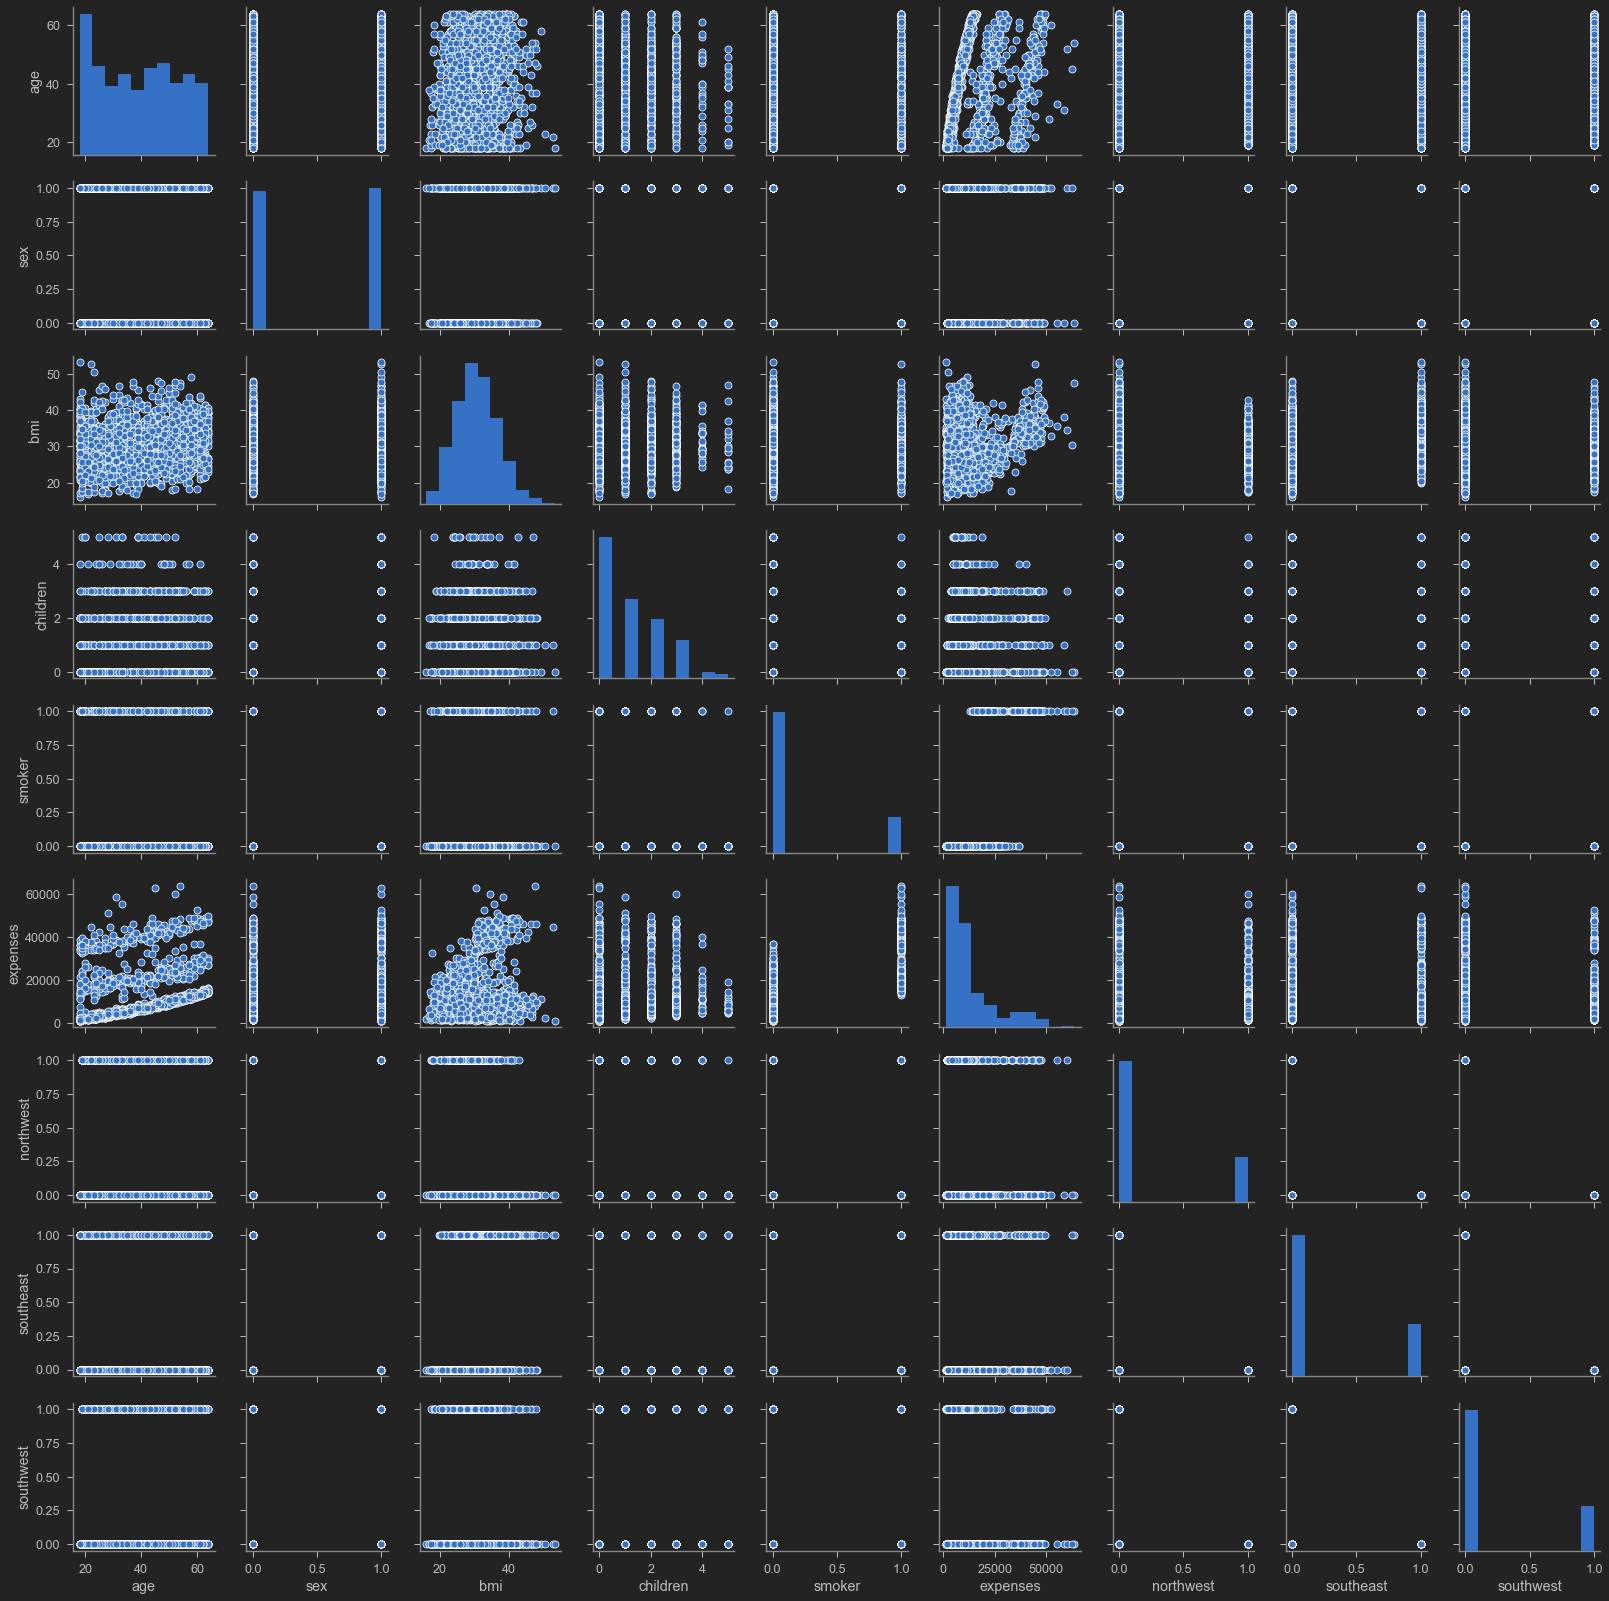

In [91]:
# plot pairplot
sns.pairplot(insurance_df)

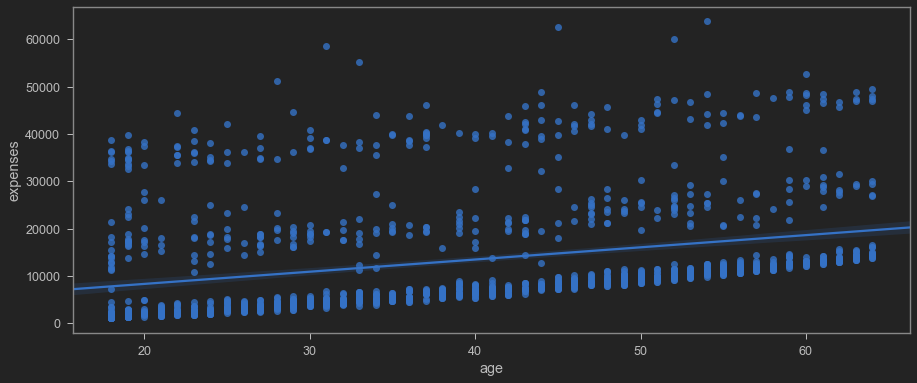

In [92]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'expenses', data = insurance_df)
plt.show()

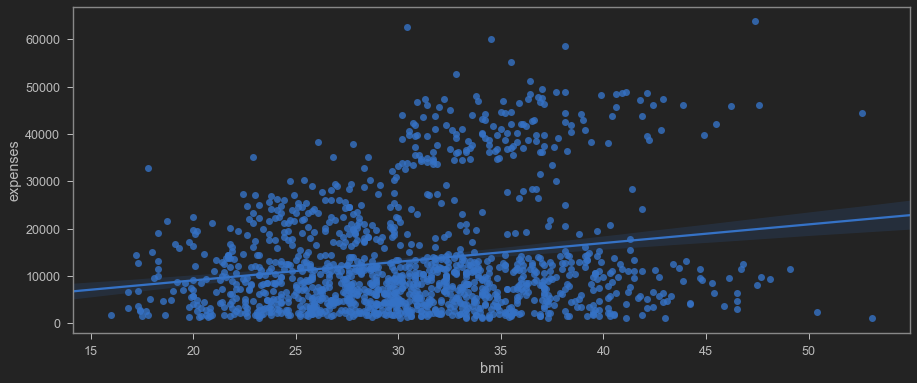

In [93]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'expenses', data = insurance_df)
plt.show()
  

Calculate and plot the correlation matrix
<br>
Which feature has the most positive correlation with charges?

In [94]:
insurance_df.corr()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


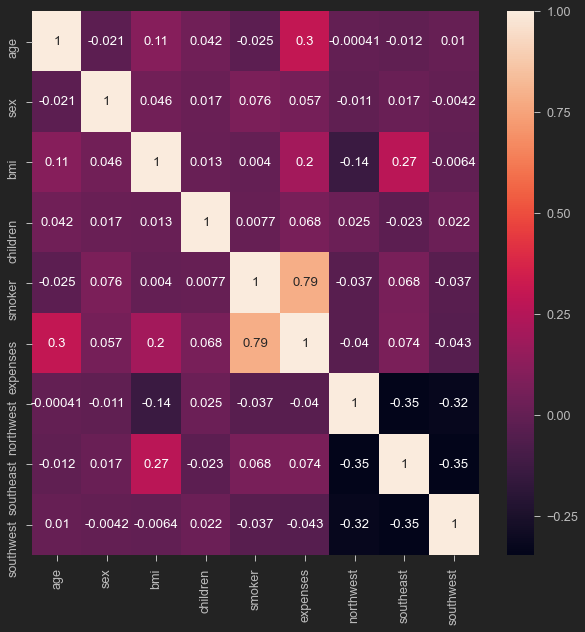

In [95]:
plt.figure(figsize = (10,10))
sns.heatmap(insurance_df.corr(), annot = True)

### Task 6: Create Training and Testing Datasets

In [96]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'expenses', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [99]:
X = insurance_df.drop(columns=['expenses'])
y = insurance_df['expenses']

In [100]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,1
1,18,1,33.8,1,0,0,1,0
2,28,1,33.0,3,0,0,1,0
3,33,1,22.7,0,0,1,0,0
4,32,1,28.9,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,0,0
1334,18,0,31.9,0,0,0,0,0
1335,18,0,36.9,0,0,0,1,0
1336,21,0,25.8,0,0,0,0,1


In [101]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [102]:
X.shape

(1338, 8)

In [103]:
y.shape

(1338,)

In [104]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [105]:
y = y.reshape(-1,1)

In [106]:
# Only take the numerical variables and scale them
X 

array([[19. ,  0. , 27.9, ...,  0. ,  0. ,  1. ],
       [18. ,  1. , 33.8, ...,  0. ,  1. ,  0. ],
       [28. ,  1. , 33. , ...,  0. ,  1. ,  0. ],
       ...,
       [18. ,  0. , 36.9, ...,  0. ,  1. ,  0. ],
       [21. ,  0. , 25.8, ...,  0. ,  0. ,  1. ],
       [61. ,  0. , 29.1, ...,  1. ,  0. ,  0. ]], dtype=float32)

In [107]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

<li>Split the data into 20% Testing and 80% Training</li>
<br>
<li>Double check that the split was successful by getting the shape of both the training and testing datasets</li>

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


### Task 7: Train and evaluate a Linear Regression model in scikit-learn

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [119]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.695455502935948

In [121]:
y_predict = regression_model_sklearn.predict(X_test)

In [122]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [123]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [124]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6535.486 
MSE = 42712576.0 
MAE = 4553.48 
R2 = 0.6954555321766839 
Adjusted R2 = 0.6860487532477784


### Task #8: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [126]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [127]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7

In [136]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size= 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 0.4429 - val_loss: 0.2197
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1675 - val_loss: 0.1716
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1532 - val_loss: 0.1729
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1694
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1287 - val_loss: 0.1844
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1247 - val_loss: 0.1766
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1231 - val_loss: 0.1759
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1226 - val_loss: 0.1780
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1208 - val_loss: 0.1834
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1131 - val_loss: 0.1832
Epoch 11/

In [137]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 1ms/step - loss: 0.2645
Accuracy : 0.7355145812034607


In [138]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

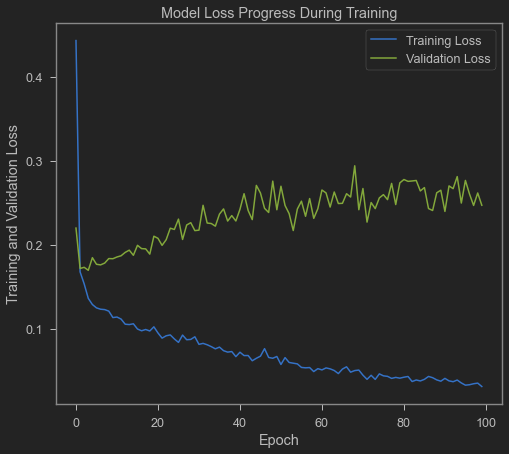

In [139]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

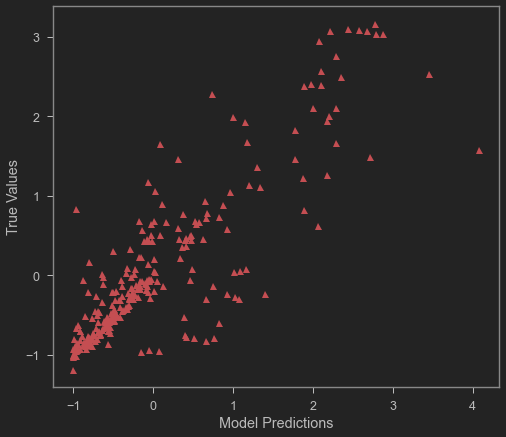

In [140]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [141]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

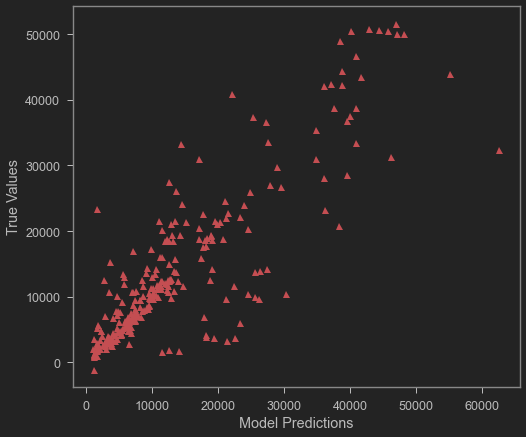

In [142]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [143]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6225.627 
MSE = 38758430.0 
MAE = 3696.894 
R2 = 0.7236489455192636 
Adjusted R2 = 0.7151130056125228
